In [7]:
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D

# Transposed Convolution

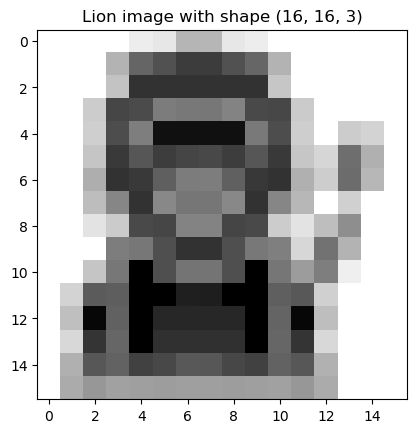

In [21]:
image_path = "../lion.png"
lion = plt.imread(image_path)
lion = lion[:,:,:3]
lion_bw = lion[:,:, 0]

plt.imshow(lion_bw, cmap='gray_r')
plt.title(f'Lion image with shape {lion.shape}')
plt.show()

## Black and white image (1 channel)

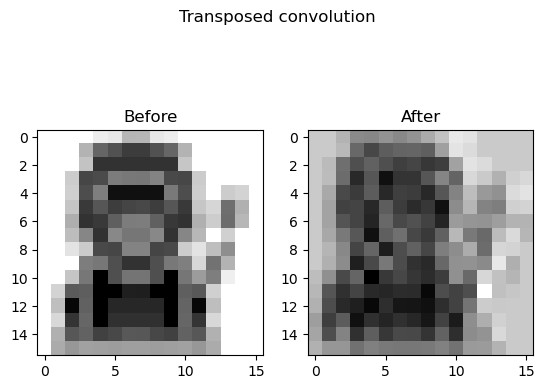

In [22]:
# Expand dimensions.
lion_in_batch = lion_bw[np.newaxis,:,:, np.newaxis]
lion_in_batch.shape

# Cretae trasnposed conv and apply it over the image.
transposed_convolution = Conv2DTranspose(filters=1, kernel_size=(3, 3), padding='same')
output = transposed_convolution(lion_in_batch).numpy().reshape(16, 16)

plt.subplot(121)
plt.imshow(lion_bw, cmap='gray_r')
plt.title(f'Before')

plt.subplot(122)
plt.imshow(output, cmap='gray_r')
plt.title(f'After')

plt.suptitle('Transposed convolution')
plt.show()

## Upsampling (1 channel)

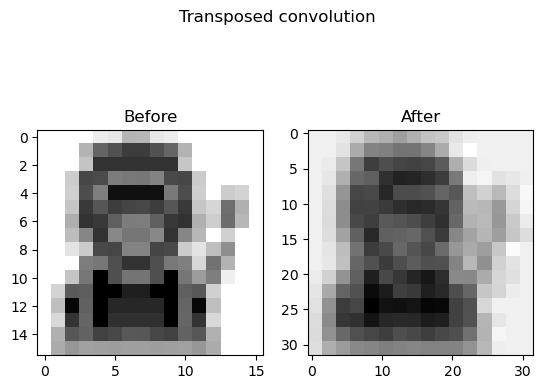

In [40]:
# Expand dimensions.
lion_in_batch = lion_bw[np.newaxis,:,:, np.newaxis]
lion_in_batch.shape

# Cretae trasnposed conv and apply it over the image.
transposed_convolution = Conv2DTranspose(filters=1, kernel_size=(3, 3), padding='same')
output = transposed_convolution(lion_in_batch)
output = UpSampling2D()(output)
output = output.numpy().reshape(32, 32)

plt.subplot(121)
plt.imshow(lion_bw, cmap='gray_r')
plt.title(f'Before')

plt.subplot(122)
plt.imshow(output, cmap='gray_r')
plt.title(f'After')

plt.suptitle('Transposed convolution')
plt.show()

## 3 Channels (not working yet)

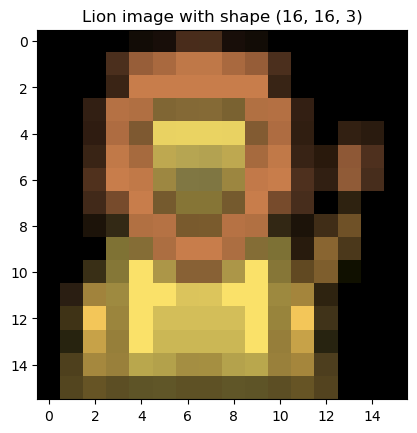

In [23]:
plt.imshow(lion[:,:,:3])
plt.title(f'Lion image with shape {lion.shape}')
plt.show()

(1, 16, 16, 3)


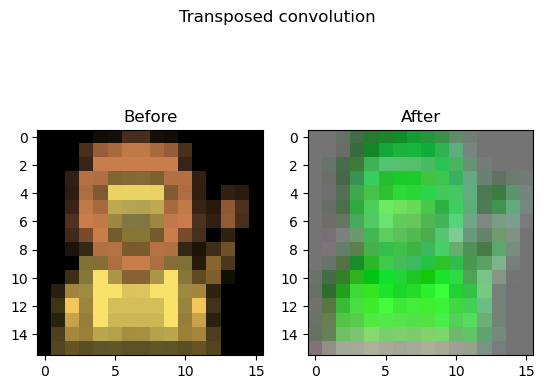

In [34]:
# Expand dimensions.
lion_in_batch = lion[np.newaxis,:,:,:]
print(lion_in_batch.shape)

# Cretae trasnposed conv and apply it over the image.
transposed_convolution = Conv2DTranspose(filters=3, kernel_size=(3, 3), padding='same')
output = transposed_convolution(lion_in_batch).numpy().reshape(16, 16, 3)

# Convert to uint8: scale between 0...1, then scale again.
output = (output - output.min()) / (output.max() - output.min())
output *= 255
output = output.astype('uint8')

plt.subplot(121)
plt.imshow(lion, cmap='gray_r')
plt.title(f'Before')

plt.subplot(122)
plt.imshow(output, cmap='gray_r')
plt.title(f'After')

plt.suptitle('Transposed convolution')
plt.show()

(0.89404714, -0.69708484)